# Training a network on the CIFAR10 dataset

We'll train a custom network on the cifar10 dataset. CIFAR10 is a dataset of images categorized into 10 categories. Goal of the network is to classify the images into the correct category.

Let's start with loading any libraries you need.

In [3]:
# Load libraries you need here
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt


2023-12-07 20:41:01.782614: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Load the data from the CIFAR10. The CIFAR-10 dataset contains 60,000 32x32 color images in 10 classes.
Info can be found in the documentation: https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/load_data

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
# Use a portion of the training data as validation data. Do you need to do any preprocessing?

In [5]:
import numpy as np

np.isnan(x_train).any(),np.isnan(x_test).any()

(False, False)

In [6]:
input_shape = x_train.shape[1:]
print(input_shape)

(32, 32, 3)


In [7]:
x_train=x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 3)
x_train=x_train / 255.0
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 3)
x_test=x_test / 255.0

In [17]:
x_train.shape, y_train.shape

((40000, 32, 32, 3), (40000, 10))

In [9]:
from tensorflow.keras.utils import to_categorical
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [10]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

Create your model using conv2D layers, some type of pooling and finish with a dense network.

In [11]:
model = tf.keras.Sequential()
model.add(
    tf.keras.layers.Conv2D(
        32, (3, 3), activation="relu", input_shape=(32, 32, 3), padding="same"
    )
)
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation="relu"))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(64, (3, 3), activation="relu", padding="same"))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation="relu"))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(10, activation="softmax"))
model.compile(optimizer="Adam", loss="categorical_crossentropy", metrics=["accuracy"])

Train your model. Since the dataset is so big not a lot of epochs should be needed to start seeing results.

In [12]:
train_data_size = int(len(x_train) * 0.8)
x_train, x_val = x_train[:train_data_size], x_train[train_data_size:]
y_train, y_val = y_train[:train_data_size], y_train[train_data_size:]

In [13]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((40000, 32, 32, 3), (40000, 10), (10000, 32, 32, 3), (10000, 10))

In [14]:
type(x_train), type(y_train), type(x_val), type(y_val)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [16]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [15]:
asd

NameError: name 'asd' is not defined

In [ ]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))


Epoch 1/10
1250/1250 [==============================] - 106s 85ms/step - loss: 1.3973 - accuracy: 0.4920 - val_loss: 1.1263 - val_accuracy: 0.6023
Epoch 2/10
1250/1250 [==============================] - 105s 84ms/step - loss: 1.1041 - accuracy: 0.6107 - val_loss: 0.9801 - val_accuracy: 0.6591
Epoch 3/10
1250/1250 [==============================] - 108s 87ms/step - loss: 0.9707 - accuracy: 0.6592 - val_loss: 0.8549 - val_accuracy: 0.6999
Epoch 4/10
1250/1250 [==============================] - 111s 89ms/step - loss: 0.8731 - accuracy: 0.6937 - val_loss: 0.8675 - val_accuracy: 0.6966
Epoch 5/10
1250/1250 [==============================] - 105s 84ms/step - loss: 0.8142 - accuracy: 0.7119 - val_loss: 0.8076 - val_accuracy: 0.7194
Epoch 6/10
1250/1250 [==============================] - 105s 84ms/step - loss: 0.7604 - accuracy: 0.7327 - val_loss: 0.7985 - val_accuracy: 0.7280
Epoch 7/10
1250/1250 [==============================] - 105s 84ms/step - loss: 0.7191 - accuracy: 0.7456 - val_loss: 0

In [ ]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
loss, accuracy, val_loss, val_accuracy = history_dict['loss'], history_dict['accuracy'], history_dict['val_loss'], history_dict['val_accuracy']

In [ ]:
print('loss: ', loss, '\naccuracy: ', accuracy, '\nval_loss: ', val_loss, '\nval_accuracy: ', val_accuracy)

loss:  [1.3972558975219727, 1.1041048765182495, 0.9706602692604065, 0.8730636835098267, 0.8141505122184753, 0.7604236602783203, 0.7191241979598999, 0.6864455342292786, 0.6538566946983337, 0.6203975081443787] 
accuracy:  [0.4920499920845032, 0.6106500029563904, 0.6591500043869019, 0.6937000155448914, 0.711899995803833, 0.7327499985694885, 0.7455750107765198, 0.7551249861717224, 0.7673749923706055, 0.7752500176429749] 
val_loss:  [1.1263461112976074, 0.9801185727119446, 0.8549290895462036, 0.8675236105918884, 0.8075751662254333, 0.7984543442726135, 0.7416073083877563, 0.735313892364502, 0.7299878597259521, 0.6991399526596069] 
val_accuracy:  [0.6022999882698059, 0.6590999960899353, 0.6998999714851379, 0.6966000199317932, 0.7193999886512756, 0.7279999852180481, 0.743399977684021, 0.7491000294685364, 0.7458000183105469, 0.7602999806404114]


Visualize the model performance

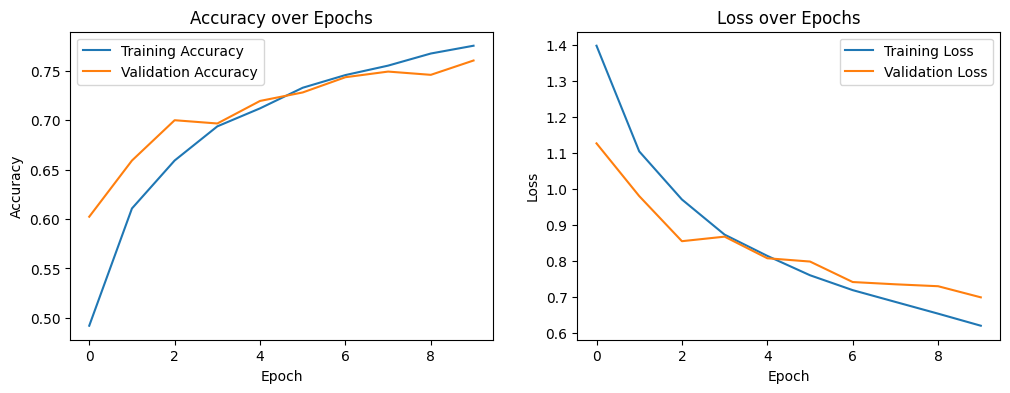

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


Evaluate on the test set

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)

# prints and plots you might need to evaluate.


313/313 - 3s - loss: 0.7214 - accuracy: 0.7547 - 3s/epoch - 9ms/step


# Excercise
Experiment with different architectures and try to find a model that performs well.

In [ ]:
# advanced model with hyperparameter tuning
def create_model(
    filters=32,
    kernel_size=(3, 3),
    conv_strides=1,
    padding="same",
    activation="relu",
    dropout_rate=0.2,
    kernel_initializer="he_uniform",
    bias_initializer="zeros",
    kernel_regularizer=tf.keras.regularizers.l2(0.001),
    bias_regularizer=tf.keras.regularizers.l2(0.001),
    activity_regularizer=tf.keras.regularizers.l2(0.001),
    kernel_constraint=tf.keras.constraints.MaxNorm(3),
    bias_constraint=tf.keras.constraints.MaxNorm(3),
    pool_size=(2, 2),
    pool_strides=2,
    pool_padding="valid",
    dense_filters=128,
    optimizer="Adam",
    loss="categorical_crossentropy",
    accuracy="accuracy",
):
    model = tf.keras.Sequential()

    # First block
    model.add(
        tf.keras.layers.Conv2D(
            filters=filters,
            strides=conv_strides,
            kernel_size=kernel_size,
            activation=activation,
            input_shape=(32, 32, 3),
            padding=padding,
            kernel_initializer=kernel_initializer,
            bias_initializer=bias_initializer,
            kernel_regularizer=kernel_regularizer,
            bias_regularizer=bias_regularizer,
            activity_regularizer=activity_regularizer,
            kernel_constraint=kernel_constraint,
            bias_constraint=bias_constraint,
        )
    )
    model.add(
        tf.keras.layers.MaxPooling2D(
            pool_size=pool_size,
            strides=pool_strides,
            padding=pool_padding,
            data_format=None,
        )
    )
    model.add(tf.keras.layers.Dropout(dropout_rate))

    # Second block
    model.add(
        tf.keras.layers.Conv2D(
            filters=filters,
            strides=conv_strides,
            kernel_size=kernel_size,
            activation=activation,
            padding=padding,
            kernel_initializer=kernel_initializer,
            bias_initializer=bias_initializer,
            kernel_regularizer=kernel_regularizer,
            bias_regularizer=bias_regularizer,
            activity_regularizer=activity_regularizer,
            kernel_constraint=kernel_constraint,
            bias_constraint=bias_constraint,
        )
    )
    model.add(
        tf.keras.layers.MaxPooling2D(
            pool_size=pool_size,
            strides=pool_strides,
            padding=pool_padding,
            data_format=None,
        )
    )
    model.add(tf.keras.layers.Dropout(dropout_rate))

    # Dense layers
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(dense_filters, activation=activation))
    model.add(tf.keras.layers.Dropout(dropout_rate))

    model.add(tf.keras.layers.Dense(dense_filters, activation=activation))
    model.add(tf.keras.layers.Dropout(dropout_rate))
    model.add(tf.keras.layers.Dense(10, activation="softmax"))

    # Compile the model
    model.compile(optimizer=optimizer, loss=loss, metrics=accuracy)

    return model

In [ ]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

In [ ]:
model_to_tune = KerasClassifier(
    build_fn=create_model,
    verbose=1,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    filters=32,
    kernel_size=(3, 3),
    conv_strides=1,
    padding="same",
    activation="relu",
    dropout_rate=0.2,
    kernel_initializer="he_uniform",
    bias_initializer="zeros",
    kernel_regularizer=tf.keras.regularizers.l2(0.001),
    bias_regularizer=tf.keras.regularizers.l2(0.001),
    activity_regularizer=tf.keras.regularizers.l2(0.001),
    kernel_constraint=tf.keras.constraints.MaxNorm(3),
    bias_constraint=tf.keras.constraints.MaxNorm(3),
    pool_size=(2, 2),
    pool_strides=2,
    pool_padding="valid",
    dense_filters=128,
    optimizer="Adam",
    loss="categorical_crossentropy",
    accuracy="accuracy",
)

In [ ]:
param_grid = {
    "filters": [32, 64, 128, 256, 512],
    "kernel_size": [(3, 3), (5, 5), (7, 7)],
    "conv_strides": [1, 2],
    "padding": ["same", "valid"],
    "activation": ["relu", "sigmoid", "tanh"],
    "dropout_rate": [0.2, 0.3, 0.4],
    "kernel_initializer": ["he_uniform", "he_normal"],
    "bias_initializer": ["zeros", "ones"],
    "kernel_regularizer": [tf.keras.regularizers.l2(0.001),tf.keras.regularizers.l2(0.01), None],
    "bias_regularizer": [tf.keras.regularizers.l2(0.001),tf.keras.regularizers.l2(0.01), None],
    "activity_regularizer": [tf.keras.regularizers.l2(0.001),tf.keras.regularizers.l2(0.01), None],
    "kernel_constraint": [tf.keras.constraints.MaxNorm(3), tf.keras.constraints.MaxNorm(2), None],
    "pool_size": [(2, 2), (3, 3)],
    "pool_strides": [1, 2],
    "pool_padding": ["same", "valid"],
    "dense_filters": [128, 256, 512],
    "optimizer": ["Adam", "SGD"],
    "loss": ["categorical_crossentropy"],
    "accuracy": ["accuracy"],
}

In [ ]:
grid = GridSearchCV(estimator=model_to_tune, param_grid=param_grid, n_jobs=-1, cv=3)

In [ ]:
grid_result = grid.fit(x_train, y_train)

python(73101) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(73118) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(73119) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(73120) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(73121) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(73122) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(73123) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(73124) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(73125) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(73126) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(73127) Malloc

Epoch 1/10
Epoch 1/10
Epoch 1/10
Epoch 1/10
Epoch 1/10
Epoch 1/10
Epoch 1/10
Epoch 1/10
Epoch 1/10
Epoch 1/10
Epoch 1/10
Epoch 1/10
Epoch 1/10
Epoch 1/10
Epoch 1/10
Epoch 1/10
667/667 [==============================] - 528s 532ms/step - loss: 2.1762 - accuracy: 0.3384 - val_loss: 1.6110 - val_accuracy: 0.4655
Epoch 2/10
Epoch 2/10
Epoch 2/10
Epoch 2/10
345/667 [==============>...............] - ETA: 5:27 - loss: 4.1791 - accuracy: 0.2168Epoch 2/10
Epoch 2/10
Epoch 2/10
667/667 [==============================] - 209s 314ms/step - loss: 1.5211 - accuracy: 0.4977 - val_loss: 1.3754 - val_accuracy: 0.5613
Epoch 3/10
667/667 [==============================] - 210s 314ms/step - loss: 1.5484 - accuracy: 0.4876 - val_loss: 1.4316 - val_accuracy: 0.5253
Epoch 3/10
667/667 [==============================] - 210s 315ms/step - loss: 1.5560 - accuracy: 0.4866 - val_loss: 1.4218 - val_accuracy: 0.5364
Epoch 3/10
667/667 [==============================] - 210s 315ms/step - loss: 1.5550 - accuracy: 0.

/Users/Cyrille/.local/share/virtualenvs/Deep_learning-ZjjgEFKy/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/Cyrille/.local/share/virtualenvs/Deep_learning-ZjjgEFKy/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/Cyrille/.local/share/virtualenvs/Deep_learning-ZjjgEFKy/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/Cyrille/.local/share/virtualenvs/Deep_learning-ZjjgEFKy/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning:

231/667 [=========>....................] - ETA: 5:24 - loss: 1.2156 - accuracy: 0.60450.

/Users/Cyrille/.local/share/virtualenvs/Deep_learning-ZjjgEFKy/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


234/667 [=========>....................] - ETA: 5:24 - loss: 1.1766 - accuracy: 0.6347Epoch 4/10
Epoch 4/10
 60/667 [=>............................] - ETA: 9:44 - loss: 1.34999 - accuracy: 0.5290

/Users/Cyrille/.local/share/virtualenvs/Deep_learning-ZjjgEFKy/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


667/667 [==============================] - 662s 992ms/step - loss: 1.4704 - accuracy: 0.5088 - val_loss: 1.3832 - val_accuracy: 0.5688
Epoch 4/10
112/667 [====>.........................] - ETA: 10:14 - loss: 1.3222 - accuracy: 0.56147 [==>...........................] - ETA: 9:41 - loss: 1.3676 - accuracy: 0.52........................] - ETA: 9:50 - loss: 1.3713 - accuracy: 0.526========>..................] - ETA: 5:09 - loss: 1.2184 - accuracy: 

/Users/Cyrille/.local/share/virtualenvs/Deep_learning-ZjjgEFKy/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


667/667 [==============================] - 279s 328ms/step - loss: 2.2746 - accuracy: 0.3211 - val_loss: 1.6505 - val_accuracy: 0.4507....] - ETA:......] - ETA: 1:48 - l accuracy: 0/667 [======================>.......] - ETA: 41s - loss: 2.8119 - accuracy: 0.28=============>.......] - ETA: 37s 
Epoch 2/10
667/667 [==============================] - 593s 889ms/step - loss: 1.2617 - accuracy: 0.5927 - val_loss: 1.2522 - val_accuracy: 0.6029
Epoch 5/10
667/667 [==============================] - 295s 350ms/step - loss: 2.2231 - accuracy: 0.3173 - val_loss: 1.5352 - val_accuracy: 0.4921
Epoch 2/10
667/667 [==============================] - 295s 333ms/step - loss: 2.5566 - accuracy: 0.3148 - val_loss: 1.6047 - val_accuracy: 0.4687 loss: 2.5792 - accuracy: 0.31
Epoch 2/10
667/667 [==============================] - 201s 299ms/step - loss: 1.5693 - accuracy: 0.4704 - val_loss: 1.3998 - val_accuracy: 0.5311- accuracy: 0.55
Epoch 3/10
667/667 [==============================] - 723s 1s/step - loss:

In [ ]:
grid_result.best_params_

NameError: name 'grid_result' is not defined